#Sieć wielowarstwowa, uczenie

In [51]:
L=2
mi = 0.1
N = [2, 2, 1]

w = [
    [],
    [ [], [0,0,0], [0,0,0] ],
    [ [], [0,0,0] ]
]

s = [
    [],
    [None, 0, 0],
    [None, 0]
]

x = [
    [],
    [-1, 0, 0],
    [-1, 0, 0]
]

y = [
    [],
    [None, 0, 0],
    [None, 0]
]

e = [
    [],
    [None, 0, 0],
    [None, 0]
]

dlt = [
    [],
    [None, 0, 0],
    [None, 0]
]

##Losowanie wag

In [52]:
import random

def losuj_w():
  for k in range(1, L+1):
    for i in range(1, N[k]+1):
      for j in range(0, N[k-1]+1):
        w[k][i][j] = random.random()*2-1

losuj_w()

## Licz Y

In [53]:
def licz_y(u):
  for k in range(1, L+1):
    for i in range(1, N[k-1]+1):
      if k == 1:
        x[k][i] = u[i-1]
      else:
        x[k][i] = y[k-1][i]
    for i in range(1, N[k]+1):
      s[k][i] = 0
      for j in range(0, N[k-1]+1):
        s[k][i] += w[k][i][j]*x[k][j]
      y[k][i] = f(s[k][i])
  return y[L][1]

### Funkcja aktywacji

In [54]:
import math

def f(s):
  return 1/(1+math.exp(-s))

def f_poch(s):
  return f(s)*(1-f(s))

In [55]:
licz_y([0,0])

0.6675103024582747

##Licz E

In [56]:
def licz_e(d):
  for k in range(L, 1-1, -1):
    for i in range(1, N[k]+1):
      if k == L:
        e[k][i] = d - y[k][i]
      else:
        e[k][i] = 0
        for j in range(1, N[k+1]+1):
          e[k][i] += dlt[k+1][j]*w[k+1][j][i]
      dlt[k][i] = e[k][i]*f_poch(s[k][i])

##Dane XOR

In [57]:
u = [ [0,0],
      [0,1],
      [1,0],
      [1,1] ]

d = [0,1,1,0]

## Zadanie 1

In [58]:
for n in range(10000):
  for i in range(4):
    licz_y(u[i])
    licz_e(d[i])
    for k in range(1, L+1):
      for i in range(1, N[k]+1):
        for j in range(0, N[k-1]+1):
          w[k][i][j] = w[k][i][j] + 2*mi*dlt[k][i]*x[k][j]


In [59]:
for i in range(4):
  print(licz_y(u[i]))

0.027472753627482936
0.9680767516691955
0.9680216199951314
0.030922199993814785


##Zadanie 2

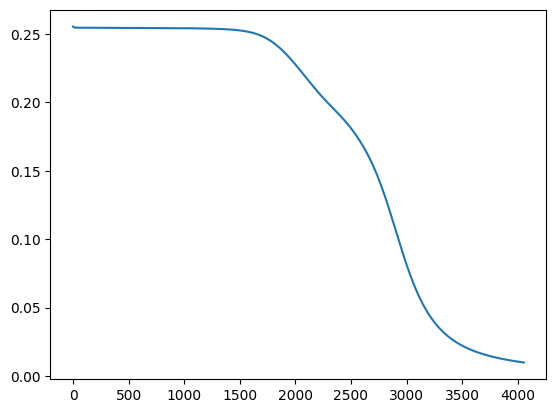

Liczba iteraji: 4057


In [68]:
import math
import matplotlib.pyplot as plt

values = []
iterations = []
losuj_w()
n = 0
Q = 1
while Q > 0.01:
  Q = 0
  for nn in range(4):
    yy=licz_y(u[nn])
    licz_e(d[nn])
    for k in range(1, L+1):
      for i in range(1, N[k]+1):
        for j in range(0, N[k-1]+1):
          w[k][i][j] = w[k][i][j] + 2*mi*dlt[k][i]*x[k][j]
    Q += (d[nn] - yy) ** 2

  Q = Q / 4

  values.append(Q)
  iterations.append(n)
  n += 1

plt.plot(iterations, values)
plt.show()

print("Liczba iteraji:", n)